In [11]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import circuit_drawer


from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)




# implement build_noise_model(p_meas,p_gate) that returns a noise model that applies the following noise models :
# - Measurement error with probability p_meas
# - Bit-flip error on every single-qubit and two-qqubit gates with porbability  p_gate
# for more information https://qiskit.github.io/qiskit-aer/stubs/qiskit_aer.noise.NoiseModel.html#qiskit_aer.noise.NoiseModel 
def build_noise_model(p_meas,p_gate):
    
    # Implement this function
    noise_model = NoiseModel()

    error_meas = pauli_error([("X", p_meas), ("I", 1 - p_meas)])
    error_gate = pauli_error([("X", p_gate), ("I", 1 - p_gate)])
    error_gate2 = error_gate.tensor(error_gate)
    noise_model.add_all_qubit_quantum_error(error_meas, "measure")
    noise_model.add_all_qubit_quantum_error(error_gate, ["u1", "u2", "u3"])
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"])
        
    return noise_model

In [12]:
# We need a circuit with n qubits, plus one auxiliary qubit
# Also need n classical bits to write the output to
n = 3

bv_circuit = QuantumCircuit(n+1, n)

# put auxiliary in state |->
bv_circuit.h(n)
bv_circuit.z(n)

# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)
    
# Apply barrier 
bv_circuit.barrier()

# Apply the inner-product oracle
s='110'
s = s[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if s[q] != '0':
        # bv_circuit.i(q)
    # else:
        bv_circuit.cx(q, n)
        
# Apply barrier 
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw(output='mpl')
noise_model = build_noise_model(0.1,0.05)

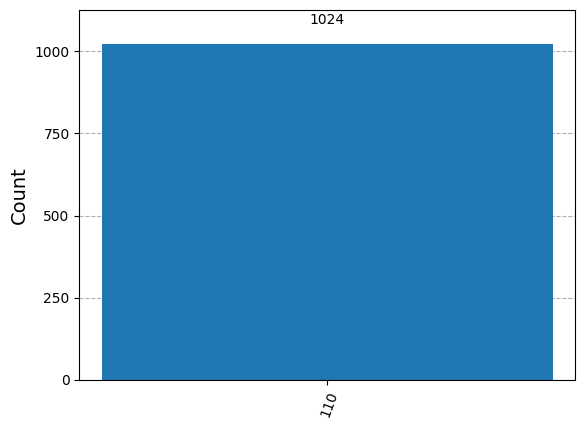

In [15]:
# Run our circuit without the noise model

sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(bv_circuit).result()
plot_histogram(result_ideal.get_counts(0))




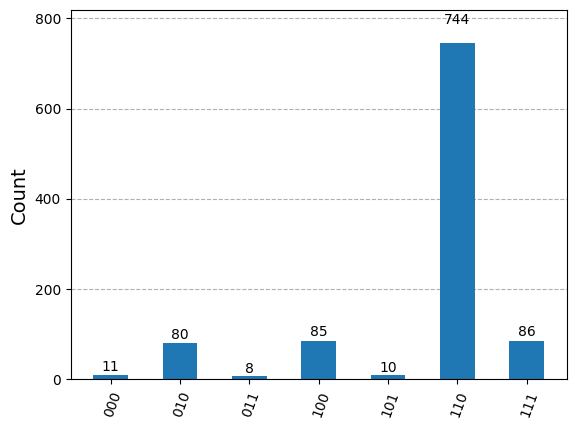

In [16]:
# Run the circuit with the noise model
# add noise model 



sim_noisy = AerSimulator(noise_model=noise_model)
result_ideal = sim_noisy.run(bv_circuit).result()
plot_histogram(result_ideal.get_counts(0))
